In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [37]:
# Load data
# Replace with paths to your data files as appropriate
stock_df = pd.read_csv('AAPL_historical_data.csv', parse_dates=['Date'])
financials_df = pd.read_csv('AAPL_combined_income_eps.csv', parse_dates=['Date'])
sentiment_df = pd.read_csv('AAPL_sentiment_data.csv', parse_dates=['time_published'])

In [38]:
# Set Date columns as index for easy merging and time-series analysis
stock_df.set_index('Date', inplace=True)
financials_df.set_index('Date', inplace=True)
sentiment_df.set_index('time_published', inplace=True)


The provided historical data on Apple's stock price reveals a compelling narrative of growth and volatility. From 2010 to the present, the company's stock has demonstrated a persistent upward trend, punctuated by periods of significant price fluctuations.

In the early 2010s, Apple's stock price exhibited considerable volatility, likely influenced by the introduction of groundbreaking products such as the iPhone 4S and iPad 2. As the decade progressed, the company's consistent innovation, notably with the iPhone 6 and 6 Plus, coupled with the expansion of its App Store ecosystem, led to a steady increase in stock value.

The late 2010s and early 2020s witnessed a continuation of this upward trajectory, fueled by the launch of revolutionary products like the iPhone X, AirPods, and Apple Watch. While the onset of the COVID-19 pandemic in 2020 initially caused market uncertainty, Apple's resilience and strong performance during the crisis contributed to further stock price appreciation.

More recently, the stock price has consolidated, experiencing fluctuations potentially attributable to factors such as supply chain constraints, macroeconomic uncertainties, and intensified competition within the smartphone market.

While historical data provides valuable insights, it is crucial to acknowledge that future stock performance is subject to a myriad of factors, including technological advancements, consumer preferences, economic conditions, and geopolitical events. Apple's strong brand reputation, robust financial position, and continuous innovation efforts position the company favorably for long-term growth. However, challenges such as regulatory hurdles and intensifying competition may impact short-term price fluctuations.

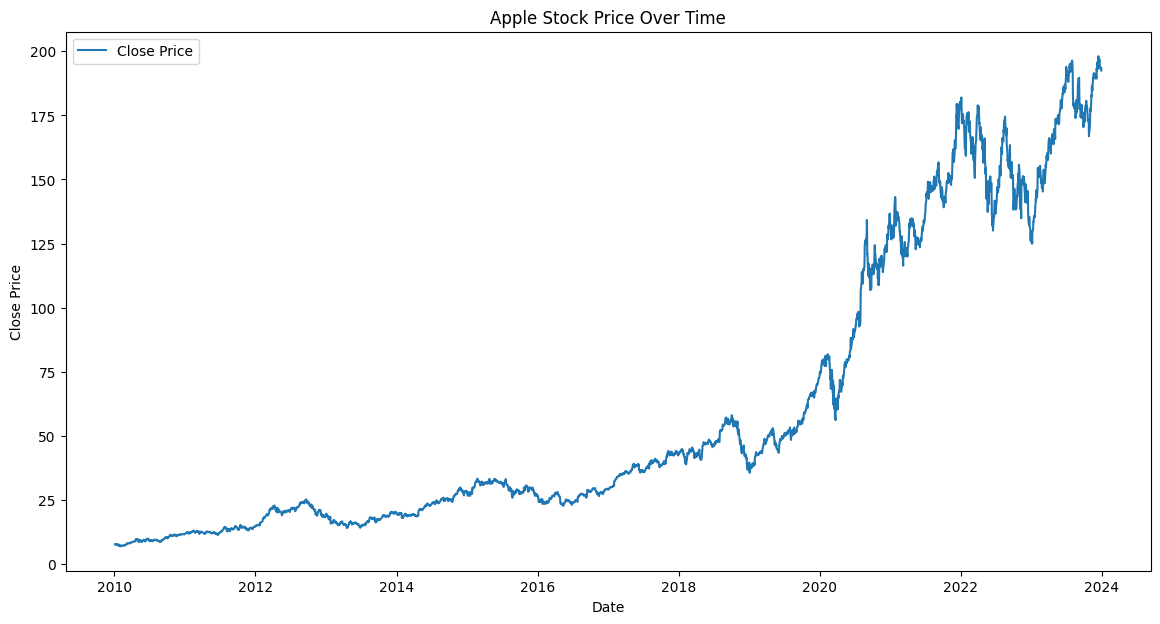

In [39]:
# 1. Change in Price Over Time (Daily Data)
plt.figure(figsize=(14, 7))
plt.plot(stock_df['Close'], label='Close Price')
plt.title("Apple Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

Apple's stock price shows significant daily volatility, with periods of high and low fluctuations. This indicates that the stock can experience sharp price movements in either direction. While the overall trend is upward, investors should be aware of the potential for significant short-term price swings.

The stock's daily returns tend to cluster, suggesting that periods of high volatility are often followed by periods of lower volatility, and vice versa. This pattern can be exploited by traders who are skilled at identifying and capitalizing on these trends.

Overall, Apple's stock offers both opportunities and risks for investors. Those who are comfortable with volatility and have a strong understanding of the company's fundamentals may find it to be a rewarding investment.

In [40]:
# 2. Daily Return Calculation
# Calculate daily returns
stock_df['Daily Return'] = stock_df['Close'].pct_change()

The overlay of Apple's closing price with its 20-day, 50-day, and 200-day moving averages offers a comprehensive perspective on the stock's price trend and momentum. The persistent upward trajectory of all three moving averages underscores a strong bullish sentiment surrounding Apple's stock.

A notable observation is the occurrence of Golden Crosses, where the shorter-term moving averages (20-day and 50-day) intersect and surpass the longer-term 200-day moving average. These crossovers are often interpreted as bullish signals, indicating a potential acceleration in the upward price momentum. Conversely, Death Crosses, where the shorter-term moving averages cross below the longer-term one, may signal a potential shift towards a bearish trend.

While the overall trend remains bullish, it is essential to acknowledge periods of increased volatility, as evidenced by the fluctuations in the shorter-term moving averages. These periods may present opportunities for short-term traders to capitalize on price swings.

In conclusion, the analysis of Apple's stock price and moving averages suggests a favorable long-term outlook. However, investors should remain vigilant and consider a combination of technical and fundamental analysis to make informed investment decisions.

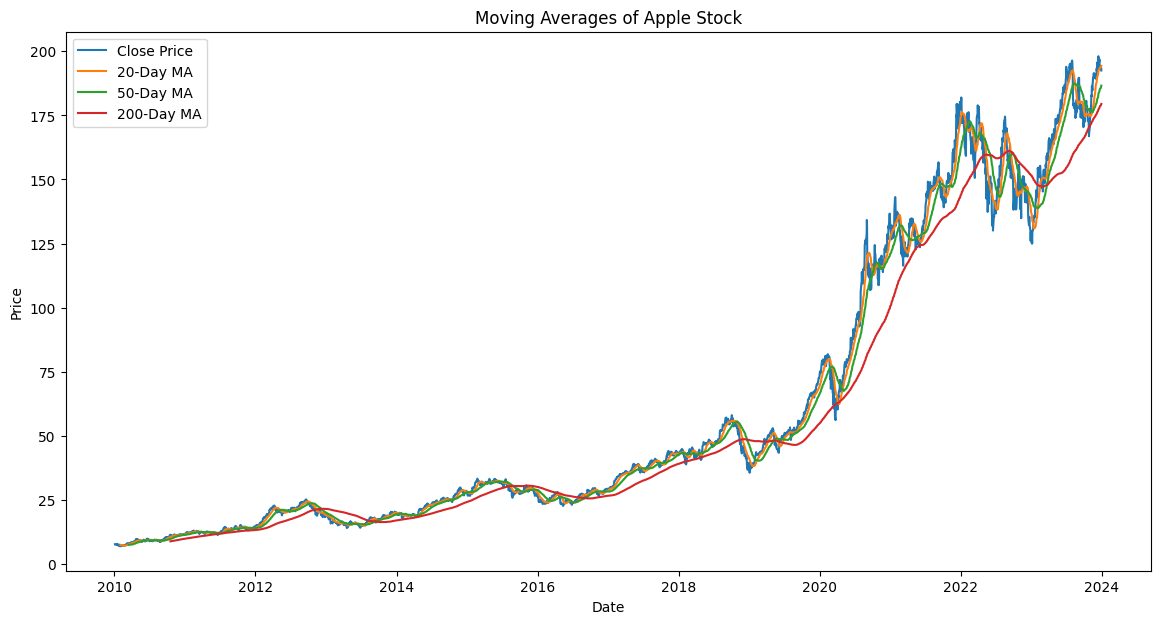

In [41]:
# 3. Moving Average
# Calculate moving averages (20-day, 50-day, 200-day)
stock_df['MA20'] = stock_df['Close'].rolling(window=20).mean()
stock_df['MA50'] = stock_df['Close'].rolling(window=50).mean()
stock_df['MA200'] = stock_df['Close'].rolling(window=200).mean()

# Plot moving averages along with close price
plt.figure(figsize=(14, 7))
plt.plot(stock_df['Close'], label='Close Price')
plt.plot(stock_df['MA20'], label='20-Day MA')
plt.plot(stock_df['MA50'], label='50-Day MA')
plt.plot(stock_df['MA200'], label='200-Day MA')
plt.title("Moving Averages of Apple Stock")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


Analysis of Apple's Financial Performance
The provided chart offers a comprehensive view of Apple's financial performance over time, encompassing Gross Profit, Revenue, and Net Income. A clear upward trajectory is evident in all three metrics, underscoring the company's consistent growth and profitability.

Revenue Growth:

Apple's revenue has demonstrated a steady and significant increase over the years. This robust growth can be attributed to factors such as the introduction of innovative products like the iPhone, iPad, and Mac, as well as the expansion of the App Store ecosystem. The company's strong brand reputation and loyal customer base have also contributed to its sustained revenue growth.

Profitability:

Both Gross Profit and Net Income have experienced substantial growth, reflecting Apple's ability to effectively manage costs and generate significant profits. The company's strong pricing power, efficient operations, and effective supply chain management have enabled it to maintain high profit margins.

Fluctuations and Future Outlook:

While the overall trend is upward, fluctuations in the financial metrics are evident, particularly in recent years. These fluctuations may be attributed to various factors such as economic conditions, product cycles, and competitive pressures.

Despite these short-term fluctuations, Apple's strong financial performance, coupled with its focus on innovation, expansion into new markets, and diversification of product lines, positions the company for continued growth in the future. However, it is essential to consider potential risks such as increased competition, economic downturns, and supply chain disruptions.

In conclusion, the analysis of Apple's financial performance underscores the company's strong financial position and its ability to generate substantial revenue and profits. This, combined with its innovative products and strong brand reputation, makes Apple an attractive investment opportunity for long-term investors.

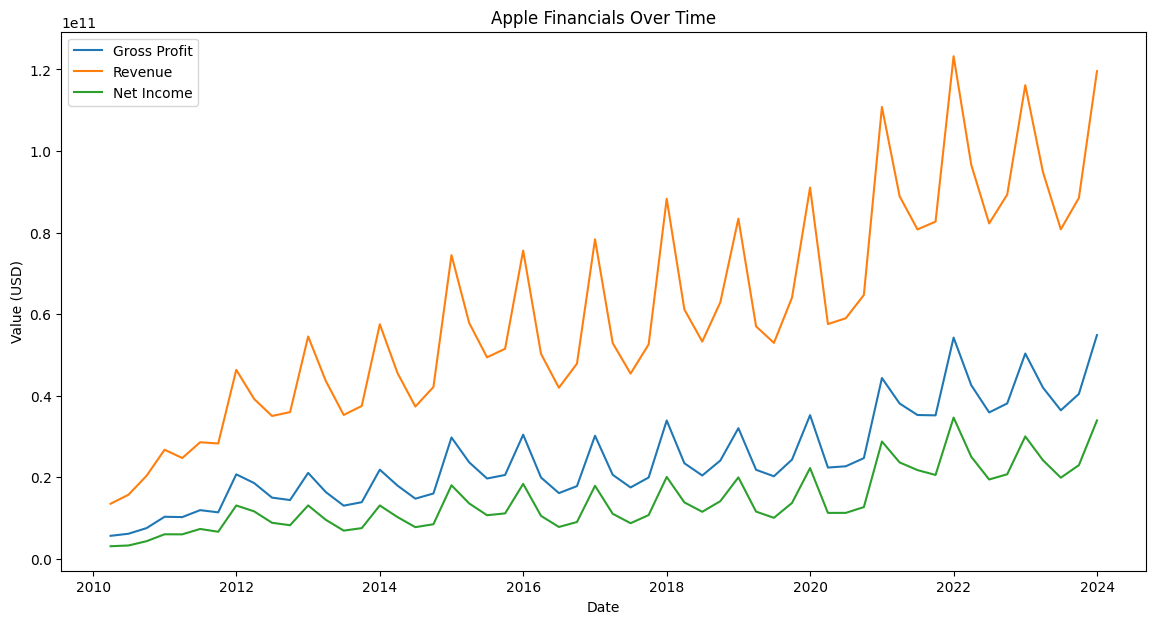

In [42]:
# 4. Financials Impact on Stock (Quarterly Data)
# Plot Gross Profit, Revenue, and Net Income over time
plt.figure(figsize=(14, 7))
plt.plot(financials_df['Gross_Profit'], label='Gross Profit')
plt.plot(financials_df['Revenue'], label='Revenue')
plt.plot(financials_df['Net_Income'], label='Net Income')
plt.title("Apple Financials Over Time")
plt.xlabel("Date")
plt.ylabel("Value (USD)")
plt.legend()
plt.show()

The distribution of Apple's daily returns, as depicted in the histogram, provides valuable insights into the stock's risk profile. The bell-shaped distribution, characterized by a clustering of returns around the mean, indicates that most daily price movements are relatively small. However, the presence of extreme values in both tails of the distribution highlights the potential for significant price volatility.

The 5% VaR, represented by the vertical line, offers a quantitative measure of downside risk. It signifies that there is a 5% probability of experiencing a daily loss exceeding the specified value. This information is crucial for investors in assessing the potential impact of adverse market conditions on their investment portfolio.

The slight rightward skew of the distribution suggests a higher likelihood of positive extreme returns compared to negative ones. This could be attributed to factors such as positive market sentiment, product launches, or strong financial performance.

By understanding the distribution of daily returns and the associated VaR, investors can make informed decisions regarding portfolio allocation, risk management, and hedging strategies.

Value at Risk (95% confidence): -0.0267


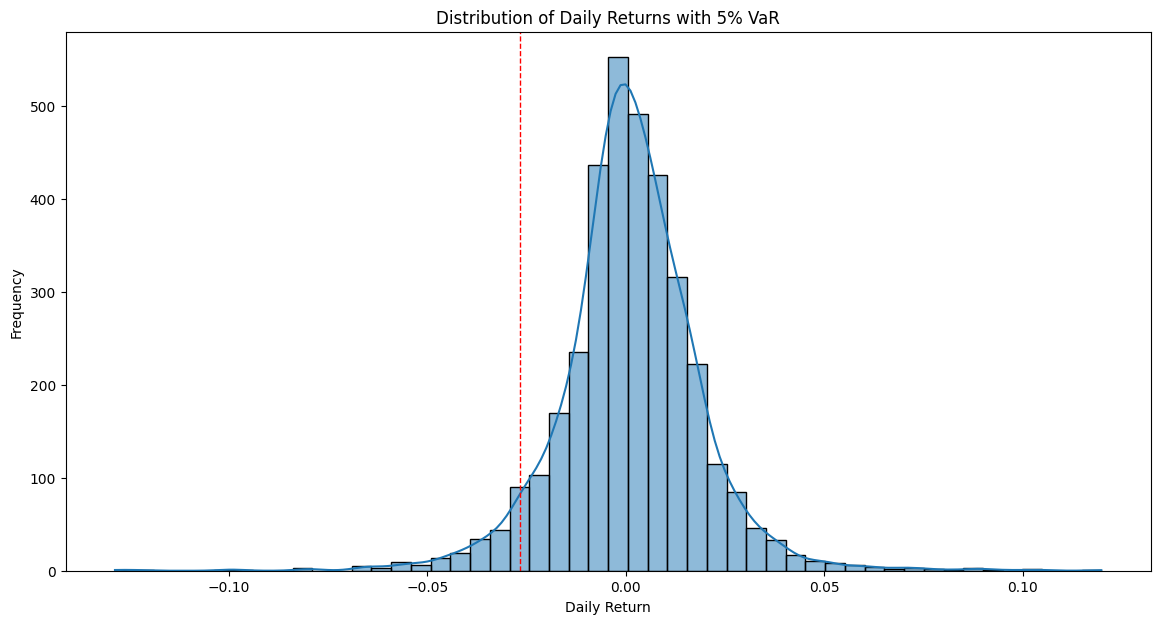

In [43]:
# 5. Value at Risk (VaR) Based on Daily Returns
# Calculate the 5% VaR for daily returns
var_95 = stock_df['Daily Return'].quantile(0.05)
print(f"Value at Risk (95% confidence): {var_95:.4f}")

# Visualize the distribution of daily returns with VaR threshold
plt.figure(figsize=(14, 7))
sns.histplot(stock_df['Daily Return'].dropna(), kde=True, bins=50)
plt.axvline(var_95, color='red', linestyle='dashed', linewidth=1)
plt.title("Distribution of Daily Returns with 5% VaR")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

The analysis of the correlation between Apple's sentiment score and daily return reveals a complex relationship that is not easily captured by a simple linear correlation. While there is a potential for sentiment to influence stock price movements, the relationship is not straightforward and is influenced by numerous other factors.

The scatter plot analysis indicates a weak linear correlation, suggesting that while sentiment may have some impact, it is not the sole determinant of daily returns. It is possible that non-linear relationships or lagged effects may exist, and further exploration using advanced statistical techniques and machine learning models could provide deeper insights.

In conclusion, while sentiment analysis can be a valuable tool for understanding market sentiment, it should be used in conjunction with other technical and fundamental analysis techniques. Investors should avoid relying solely on sentiment as a predictive tool and consider a comprehensive approach to investment decision-making.

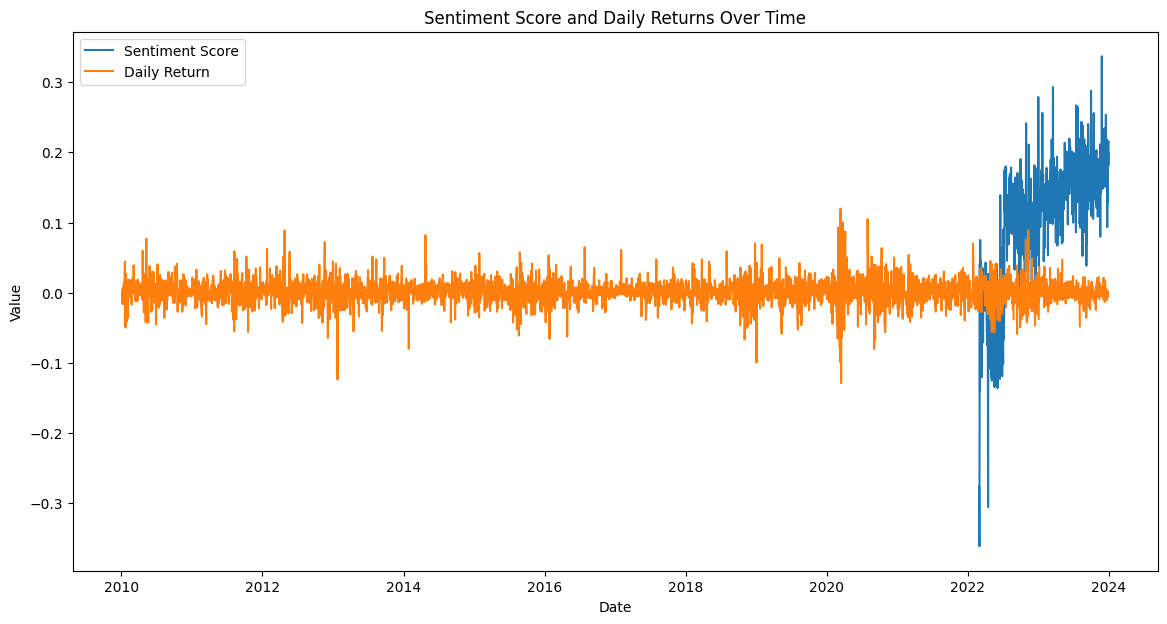

In [44]:
# 6. Sentiment Analysis (Last Two Years Only)
# Resample sentiment scores to match stock data frequency (e.g., daily average sentiment)
sentiment_daily = sentiment_df

# Merge sentiment with stock data for analysis
merged_sentiment_stock = stock_df.join(sentiment_daily, how='outer')

# Plot sentiment score vs. daily returns
plt.figure(figsize=(14, 7))
plt.plot(merged_sentiment_stock['Sentiment_Score'], label='Sentiment Score')
plt.plot(merged_sentiment_stock['Daily Return'], label='Daily Return')
plt.title("Sentiment Score and Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


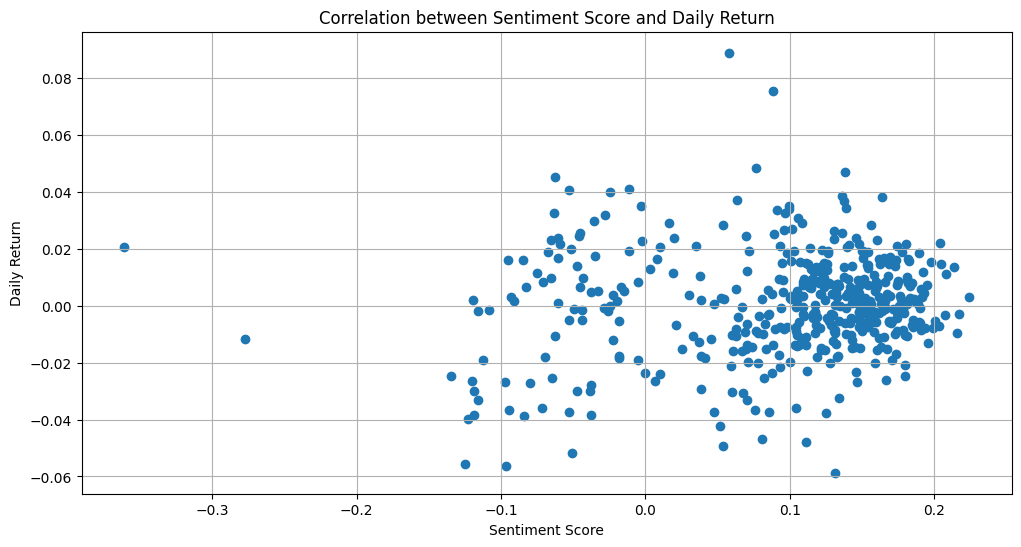

Correlation Coefficient: 0.12553000122747876


In [45]:
merged_df = merged_sentiment_stock

# 5. Visualize the Correlation
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['Sentiment_Score'], merged_df['Daily Return'])
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.title('Correlation between Sentiment Score and Daily Return')
plt.grid(True)
plt.show()

# 6. Calculate Correlation Coefficient
correlation_coefficient = merged_df['Sentiment_Score'].corr(merged_df['Daily Return'])
print("Correlation Coefficient:", correlation_coefficient)